Final Project GRAD5100

Salisa Almeida

PART 1

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)  # Set seed 

# Number of samples
num_samples = 800

# Generate ID, Group, and Feature_1
ids = ["ID" + str(i).zfill(3) for i in range(1, num_samples + 1)]
groups = np.random.choice(['A', 'B', 'C'], size=num_samples)
feature_1 = np.random.normal(loc=2500, scale=150, size=num_samples)
feature_1 = np.clip(feature_1, 2200, 2800)  # Clip values to be between 2200 and 2800

# Generate Feature_2
feature_2 = np.random.normal(loc=400, scale=15, size=num_samples)

# Generate Feature_3 based on Group
feature_3 = np.zeros(num_samples)

for i, group in enumerate(groups):
    if group == 'A':
        feature_3[i] = 3 * feature_1[i] - 5 * feature_2[i]
    elif group == 'B':
        feature_3[i] = 2 * feature_1[i]
    else:
        feature_3[i] = -feature_1[i] + feature_2[i]

# Add normally distributed random noise to Feature_3
feature_3 += np.random.normal(loc=0, scale=12, size=num_samples)

# Create DataFrame
data = {'ID': ids, 'Group': groups, 'Feature_1': feature_1, 'Feature_2': feature_2, 'Feature_3': feature_3}
df = pd.DataFrame(data)

# Display the DataFrame
print(df.head())


      ID Group    Feature_1   Feature_2    Feature_3
0  ID001     C  2536.350053  407.865441 -2148.319636
1  ID002     A  2800.000000  388.976344  6469.555633
2  ID003     C  2517.229220  394.688385 -2132.796910
3  ID004     C  2732.689428  406.803068 -2321.865915
4  ID005     A  2525.495935  418.368767  5484.739545





The theoretical distribution of Feature_1 is a normal distribution with a mean of 2500 and approximately 66% of the data falling between 2200 and 2800. Since Feature_1 is normally distributed, we can use the cumulative distribution function (CDF) of the normal distribution to estimate the probability that Feature_1 is greater than 3000.


The theoretical distribution of Feature_1 is a normal distribution. Since Feature_1 is normally distributed, we can use the cumulative distribution function (CDF) of the normal distribution to estimate the probability that Feature_1 is greater than 3000.

How many samples did you actually find where Feature_1 is greater than 3000?

The expected number of samples greater than 3000 were 0.34

In [3]:
from scipy.stats import norm

# Parameters of the normal distribution for Feature_1
mean_feature_1 = 2500
std_dev_feature_1 = 150

# Calculate the probability that Feature_1 is greater than 3000 using the cumulative distribution function (CDF)
probability_greater_than_3000 = 1 - norm.cdf(3000, loc=mean_feature_1, scale=std_dev_feature_1)

# Estimate the expected number of samples where Feature_1 is greater than 3000
expected_samples = num_samples * probability_greater_than_3000

# Display the result
print(f"Expected number of samples where Feature_1 is greater than 3000: {expected_samples:.2f}")


Expected number of samples where Feature_1 is greater than 3000: 0.34


Group the dataset by the Group field and compute the mean and standard deviation of
Feature_3 within each group.

In [4]:
grouped_df = df.groupby('Group')['Feature_3'].agg(['mean', 'std'])

# Display the result
print(grouped_df)


              mean         std
Group                         
A      5521.688545  422.127272
B      4993.918694  292.138954
C     -2089.861741  146.909917


Make a scatterplot of Feature_3 vs Feature_1.

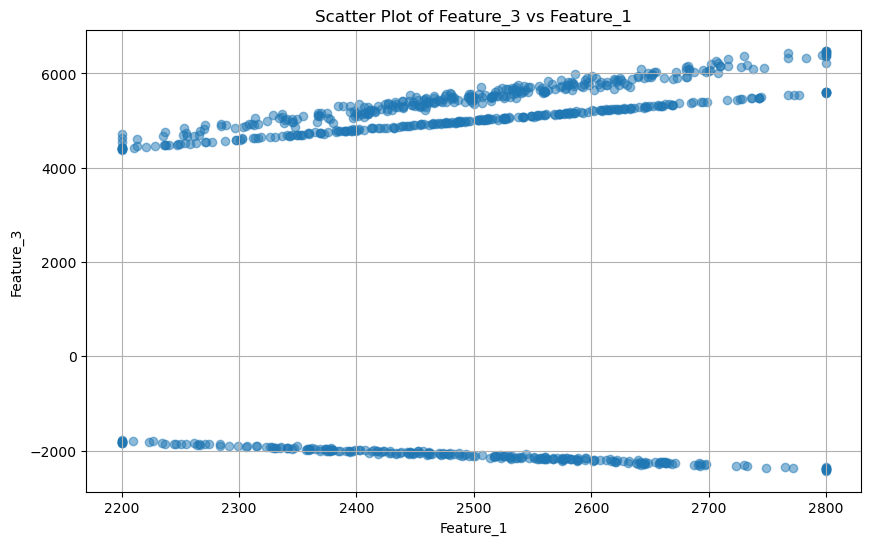

In [5]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Feature_1'], df['Feature_3'], alpha=0.5)
plt.title('Scatter Plot of Feature_3 vs Feature_1')
plt.xlabel('Feature_1')
plt.ylabel('Feature_3')
plt.grid(True)
plt.show()

Write your constructed dataframe/tibble to a csv file called fake_data.csv.

In [6]:
# Write DataFrame to CSV file
df.to_csv('fake_data.csv', index=False)